# Workflow for Abstract Analysis without Geoferenced Locations

In this application, we showcase the capability for pre-process network graphs and simplify their topologies

The workflow is structured as follows:
1. Import relevant modules / tools / packages
2. Define Hydrogen Supply Chain Alternatives
3. Run Supply Chain Model
4. Postprocessing

# 1. Import relevant modules / tools / packages

In [1]:
from HIM.workflow.scenarioExample import *

#import processing as prc
from HIM import dataHandling as sFun
from HIM import optiSetup as optiFun
from HIM import hscClasses as hscFun
from HIM import plotFunctions as pFun
import copy as copy
pathPlot=None
from HIM import hscAbstract as hscA

# 2. Define Hydrogen Supply Chain Alternatives

In [2]:
hscPathways=[["Electrolyzer","None","Compressor", "GH2-Cavern","None","Compressor","Pipeline","Compressor","GH2-Truck","GH2 (Trailer)"],
             ["Electrolyzer","None","Compressor", "GH2-Cavern","None","Compressor","Pipeline","None","Pipeline","GH2 (Pipeline)"],
             ["Electrolyzer","None","Compressor", "GH2-Cavern","None","Compressor","GH2-Truck","None","None","GH2 (Trailer)"],
             ["Electrolyzer","None","Compressor", "GH2-Cavern","None","Liquefaction","LH2-Truck","None","None","LH2"],
             ["Electrolyzer","None","Compressor", "GH2-Cavern","None","Hydrogenation","LOHC-Truck","None","None","LOHC (NG)"],
             ["Electrolyzer","None","Liquefaction", "LH2-Tank","Evaporation","Compressor","Pipeline","Compressor","GH2-Truck","GH2 (Trailer)"],
             ["Electrolyzer","None","Liquefaction", "LH2-Tank","Evaporation","Compressor","Pipeline","None","Pipeline","GH2 (Pipeline)"],
             ["Electrolyzer","None","Liquefaction", "LH2-Tank","Evaporation","Compressor","GH2-Truck","None","None","GH2 (Trailer)"],
             ["Electrolyzer","Liquefaction","None", "LH2-Tank","None","None","LH2-Truck","None","None","LH2"],
             ["Electrolyzer","None","Hydrogenation", "LOHC-Tank","Dehydrogenation","Compressor","Pipeline","Compressor","GH2-Truck","GH2 (Trailer)"],
             ["Electrolyzer","None","Hydrogenation", "LOHC-Tank","Dehydrogenation","Compressor","Pipeline","None","Pipeline","GH2 (Pipeline)"],
             ["Electrolyzer","None","Hydrogenation", "LOHC-Tank","Dehydrogenation","Compressor","GH2-Truck","None","None","GH2 (Trailer)"],
             ["Electrolyzer","Hydrogenation","None", "LOHC-Tank","None","None","LOHC-Truck","None","None","LOHC (NG)"]]

In [3]:
dfHSC=pd.DataFrame(hscPathways, columns=["Production",
                                         "Connector1",
                                         "Connector2",
                                         "Storage",
                                         "Connector3",
                                        "Connector4",
                                         "Transport1",
                                         "Connector5",
                                         "Transport2",
                                         "Station"])
nameHSC=[]
for key, values in dfHSC.iterrows():
    if values["Transport2"]=="None":
        nameHSC.append(values["Storage"]+"\n"+values["Transport1"])
    elif values["Transport2"]=="Pipeline":
        nameHSC.append(values["Storage"]+"\nPipePipe")
    else:
        nameHSC.append(values["Storage"]+"\nPipe+"+values["Transport2"])
                       
dfHSC["General"]=nameHSC

In [4]:
dfHSC

,Production,Connector1,Connector2,Storage,Connector3,Connector4,Transport1,Connector5,Transport2,Station,General
0,Electrolyzer,None,Compressor,GH2-Cavern,None,Compressor,Pipeline,Compressor,GH2-Truck,GH2 (Trailer),GH2-Cavern\nPipe+GH2-Truck
1,Electrolyzer,None,Compressor,GH2-Cavern,None,Compressor,Pipeline,None,Pipeline,GH2 (Pipeline),GH2-Cavern\nPipePipe
2,Electrolyzer,None,Compressor,GH2-Cavern,None,Compressor,GH2-Truck,None,None,GH2 (Trailer),GH2-Cavern\nGH2-Truck
3,Electrolyzer,None,Compressor,GH2-Cavern,None,Liquefaction,LH2-Truck,None,None,LH2,GH2-Cavern\nLH2-Truck
4,Electrolyzer,None,Compressor,GH2-Cavern,None,Hydrogenation,LOHC-Truck,None,None,LOHC (NG),GH2-Cavern\nLOHC-Truck
5,Electrolyzer,None,Liquefaction,LH2-Tank,Evaporation,Compressor,Pipeline,Compressor,GH2-Truck,GH2 (Trailer),LH2-Tank\nPipe+GH2-Truck
6,Electrolyzer,None,Liquefaction,LH2-Tank,Evaporation,Compressor,Pipeline,None,Pipeline,GH2 (Pipeline),LH2-Tank\nPipePipe
7,Electrolyzer,None,Liquefaction,LH2-Tank,Evaporation,Compressor,GH2-Truck,None,None,GH2 (Trailer),LH2-Tank\nGH2-Truck
8,Electrolyzer,Liquefaction,None,LH2-Tank,None,None,LH2-Truck,None,None,LH2,LH2-Tank\nLH2-Truck
9,Electrolyzer,None,Hydrogenation,LOHC-Tank,Dehydrogenation,Compressor,Pipeline,Compressor,GH2-Truck,GH2 (Trailer),LOHC-Tank\nPipe+GH2-Truck


# 3. Run Abstract Supply Chain Model

In [5]:
res=100

### Calculation of demand and distance arrays

In [6]:
demArr, distArr = builtDemDistArray(demMax=100000,     # maximal demand
                                    distMax=500,       # maximal distance
                                    res=res)           # Resolution

In [7]:
Results={}
for x in range(len(hscPathways)):
    Results[x]=hscA.HSCAbstract(demArr=demArr,
                          distArr=distArr,
                          dfTable=dfTable,
                          listHSC=hscPathways[x])
    Results[x].calcHSC()

C:\Users\m.reuss\Anaconda\envs\him\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### Initialization

In [8]:
totalCost = np.empty((len(distArr), demArr.shape[1], len(hscPathways)))
minimalCost = np.empty((len(distArr), demArr.shape[1]))

### extract data

In [9]:
for i in range(len(hscPathways)):
# Read interesting Numbers
    totalCost[:, :, i] = Results[i].cumCost["Station"]

### Cut disturbing Data

In [10]:
cuttedCost = copy.copy(totalCost)
lineCost = copy.copy(totalCost)
lineCost[:, :, :] = np.nan
minimalLineCost = np.empty((len(distArr), demArr.shape[1]))
minimalLineCost[:, :] = np.nan

for i in range(len(distArr)):
    for j in range(len(demArr.T)):
        minimalCost[i, j] = min(cuttedCost[i, j, :])

        for k in range(len(hscPathways)):
            if minimalCost[i, j] < cuttedCost[i, j, k]:
                cuttedCost[i, j, k] = np.nan
                if (
                    np.isnan(cuttedCost[i, j, k]) and np.isnan(cuttedCost[i - 1, j, k]) == False) or (np.isnan( cuttedCost[i, j, k]) == False and np.isnan(cuttedCost[i - 1, j, k]) == True):
                    if not(i == 0):
                        minimalLineCost[i, j] = minimalCost[i, j]
                        minimalLineCost[i - 1, j] = minimalCost[i - 1, j]
                        minimalLineCost[i, j - 1] = minimalCost[i, j - 1]
                elif (np.isnan(cuttedCost[i, j, k]) and np.isnan(cuttedCost[i, j - 1, k]) == False) or (np.isnan(cuttedCost[i, j, k]) == False and np.isnan(cuttedCost[i, j - 1, k]) == True):
                    if not j == 0:
                        minimalLineCost[i, j] = minimalCost[i, j]
                        minimalLineCost[i - 1, j] = minimalCost[i - 1, j]
                        minimalLineCost[i, j - 1] = minimalCost[i, j - 1]


# 4. Postprocessing

C:\Users\m.reuss\Anaconda\envs\him\lib\site-packages\HIM\plotFunctions.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


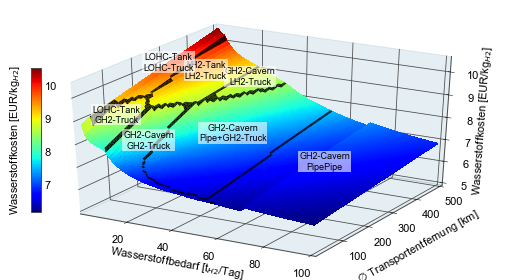

In [11]:
pFun.trisurfplotMin(
    demArr/1000,
    distArr,
    cuttedCost,
    minimalCost,
    minimalLineCost,
    dfHSC,
    figSize=(7,4),
    zmax=10.5)